# ______________________________________________________________________________________________________
# Mod√®le R√©gression Logistique
# ______________________________________________________________________________________________________

In [ ]:
# Configuration du chemin Python
import sys
import os
from pathlib import Path

# Ajouter le dossier racine du projet au PYTHONPATH
project_root = Path().absolute().parent
sys.path.append(str(project_root))

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.models.logistic_regression import LogisticRegressionModel

# Charger les donn√©es (maintenant correctement encod√©es)
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')['0']  # Note: le nom de la colonne est maintenant '0'
y_val = pd.read_csv('../data/processed/y_val.csv')['0']

#  Entra√Æner et √©valuer le mod√®le
model = LogisticRegressionModel()
model.train(X_train, y_train)


# R√©gression Logistique
from src.models.logistic_regression import LogisticRegressionModel

log_reg = LogisticRegressionModel()
log_reg.train(X_train, y_train)
val_metrics = log_reg.evaluate(X_val, y_val)

# Afficher les m√©triques
print("M√©triques R√©gression Logistique :")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.3f}")


M√©triques R√©gression Logistique :
accuracy: 0.739
precision: 0.509
recall: 0.778
f1: 0.616
roc_auc: 0.835


## Analyse des Performances
M√©triques obtenues :

##### Accuracy (Pr√©cision globale) : 73.9% - Le mod√®le pr√©dit correctement 3 clients sur 4
##### Precision : 50.9% - Quand le mod√®le pr√©dit un churn, il a raison 1 fois sur 2
##### Recall (Sensibilit√©) : 77.8% - Le mod√®le d√©tecte 78% des vrais churns
##### F1-Score : 61.6% - Bon √©quilibre entre pr√©cision et rappel
##### ROC-AUC : 83.5% - Excellente capacit√© de discrimination

### Points positifs :

ROC-AUC de 83.5% : Le mod√®le distingue tr√®s bien les clients fid√®les des churners
Recall √©lev√© (77.8%) : Capture la majorit√© des clients √† risque de partir
Baseline solide : Performance acceptable pour un premier mod√®le

### Points d'am√©lioration :

Precision faible (50.9%) : Beaucoup de faux positifs (clients pr√©dits en churn mais qui restent)
Cela peut entra√Æner des co√ªts inutiles si on contacte trop de clients "faussement" identifi√©s

## Visualisation

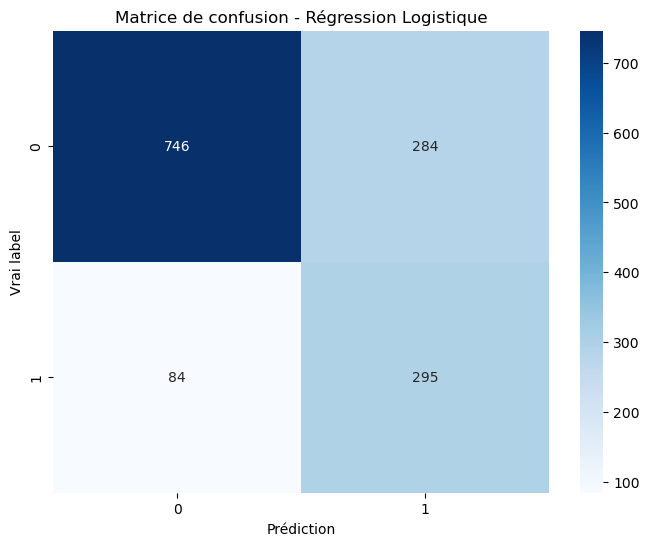

In [5]:

# Visualisations
model.plot_confusion_matrix(X_val, y_val)


#### Matrice de Confusion - Synth√®se

**R√©sultats :**
-  **746** clients fid√®les bien identifi√©s
-  **284** faux positifs (clients fid√®les pr√©dits churners)
-  **84** churners manqu√©s
-  **295** churners bien d√©tect√©s

**Diagnostic :** 
- **Force** : Bonne d√©tection globale (74% accuracy)
- **Faiblesse** : Trop de faux positifs (49% des pr√©dictions de churn sont fausses)



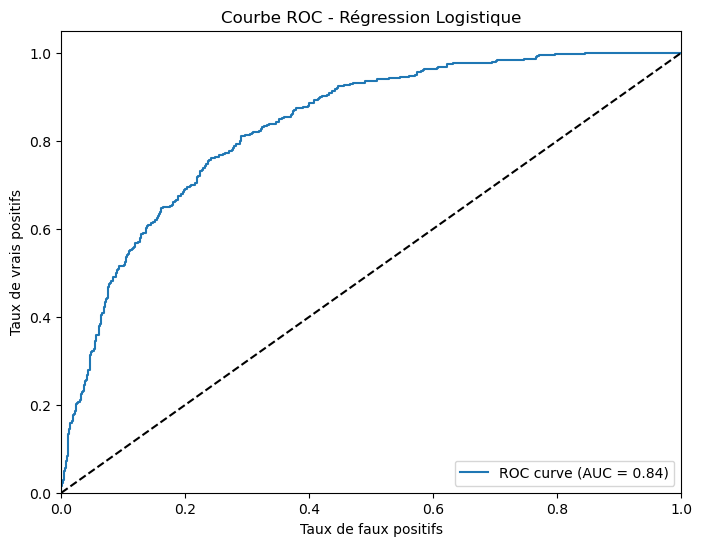

In [6]:
model.plot_roc_curve(X_val, y_val)


#### Courbe ROC - Synth√®se

**Performance :**
- **AUC = 0.84** : Excellente capacit√© de discrimination
- Courbe bien au-dessus de la diagonale (mod√®le al√©atoire)

**Interpr√©tation :**
- Le mod√®le distingue tr√®s bien les churners des non-churners
- 84% de probabilit√© de classer correctement un churner vs un non-churner pris au hasard

**Conclusion :** Mod√®le performant avec une forte capacit√© pr√©dictive, malgr√© les faux positifs observ√©s dans la matrice de confusion.

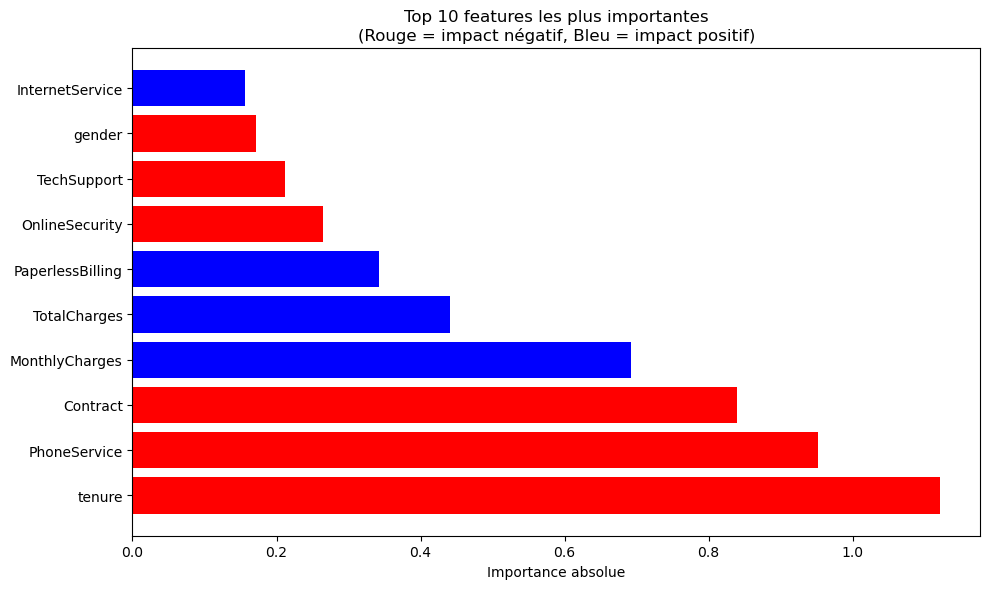

In [7]:
model.plot_feature_importance(X_train.columns)

#### Importance des Features - Synth√®se

**Top 3 pr√©dicteurs de churn :**
1. **tenure** (rouge) : Anciennet√© faible = risque √©lev√©
2. **PhoneService** (rouge) : Absence de service t√©l√©phonique = risque √©lev√©  
3. **Contract** (rouge) : Type de contrat d√©favorable = risque √©lev√©

**Facteurs protecteurs (bleu) :**
- **MonthlyCharges** : Montants √©lev√©s = clients fid√®les
- **TotalCharges** : Historique de paiement = fid√©lit√©
- **PaperlessBilling** : Facturation d√©mat√©rialis√©e = r√©tention

**Insight cl√© :** Les nouveaux clients sans services additionnels et avec des contrats flexibles sont les plus √† risque. Les clients payant plus cher restent plus fid√®les.

# _____________________________________________________________________________________________________
# Arbre de d√©cision
# ______________________________________________________________________________________________________


In [25]:


from src.models.decision_tree import DecisionTreeModel

# Cr√©er et entra√Æner le mod√®le
dt_model = DecisionTreeModel()
dt_model.train(X_train, y_train)

# √âvaluer sur l'ensemble de validation
dt_metrics = dt_model.evaluate(X_val, y_val)
print("\nM√©triques Arbre de D√©cision :")
for metric, value in dt_metrics.items():
    print(f"{metric}: {value:.3f}")


M√©triques Arbre de D√©cision :
accuracy: 0.732
precision: 0.501
recall: 0.736
f1: 0.596
roc_auc: 0.794


Comparons-les avec la r√©gression logistique :


## Analyse Comparative

**R√©gression Logistique** l√©g√®rement meilleure :
- **Meilleur ROC-AUC** (83.5% vs 79.4%) : Meilleure discrimination
- **Meilleur Recall** (77.8% vs 73.6%) : D√©tecte plus de churners
- **Performances globalement sup√©rieures**

**Arbre de D√©cision** :
- **Performances similaires** mais l√©g√®rement inf√©rieures
- ‚úÖ **Plus interpr√©table** : R√®gles de d√©cision claires
- ‚úÖ **Pas besoin de standardisation** des donn√©es


## Visualisation de l'importance des features pour l'arbre

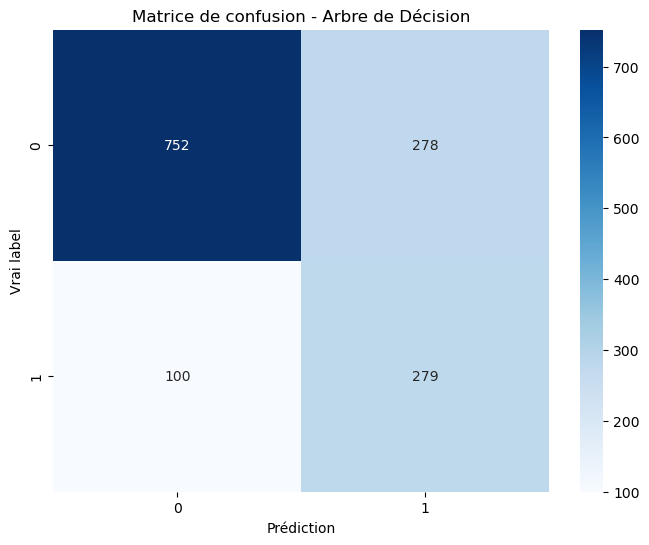

In [26]:

# 1. Matrice de confusion
dt_model.plot_confusion_matrix(X_val, y_val)




### Matrice de Confusion - Arbre de D√©cision

**R√©sultats :**
- **752** clients fid√®les bien identifi√©s (+6 vs r√©gression logistique)
- **278** faux positifs (-6 vs r√©gression logistique) 
- **100** churners manqu√©s (+16 vs r√©gression logistique)
- **279** churners bien d√©tect√©s (-16 vs r√©gression logistique)

**Comparaison avec R√©gression Logistique :**
- **L√©g√®rement moins de faux positifs** (278 vs 284)
- **Plus de churners manqu√©s** (100 vs 84)
- **Trade-off** : Moins d'actions inutiles mais plus de churners non d√©tect√©s

**Impact Business :**
- **Avantage** : √âconomies sur 6 actions de r√©tention inutiles
- **Inconv√©nient** : 16 churners suppl√©mentaires passent inaper√ßus

**Conclusion :** L'arbre est l√©g√®rement plus conservateur dans ses pr√©dictions de churn, r√©duisant les faux positifs au prix d'une d√©tection moindre des vrais churners.

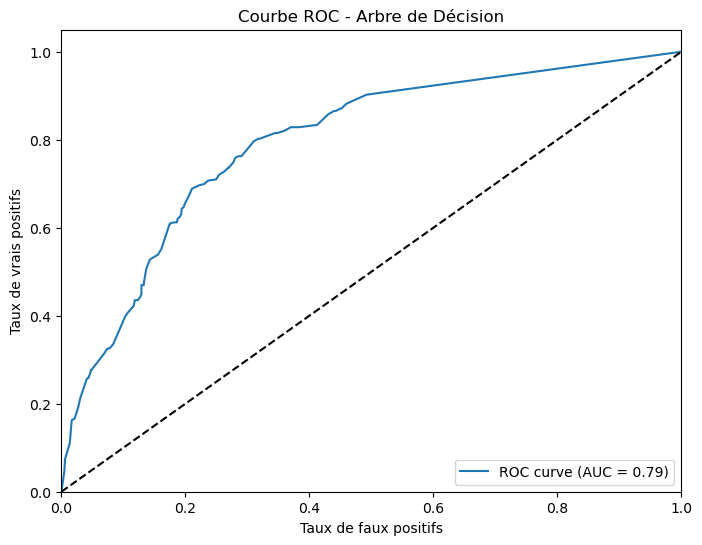

In [27]:
# 2. Courbe ROC
dt_model.plot_roc_curve(X_val, y_val)

### Courbe ROC - Arbre de D√©cision

**Performance :**
- **AUC = 0.79** : Bonne capacit√© de discrimination
- **Inf√©rieure √† la r√©gression logistique** (0.84 vs 0.79 = -5 points)

**Analyse de la courbe :**
- **Bien au-dessus de la diagonale** : Mod√®le efficace
- **Forme moins lisse** : Caract√©ristique des arbres de d√©cision
- **Plateau vers 0.9** : Limitation dans les hautes performances

**Comparaison :**
- **R√©gression Logistique** : Courbe plus lisse, AUC sup√©rieure
- **Arbre de D√©cision** : Plus de "marches" dues aux seuils discrets

**Conclusion :** L'arbre reste un bon classificateur (79% > 50% al√©atoire) mais la r√©gression logistique conserve l'avantage en termes de capacit√© pr√©dictive pure.

**Trade-off :** Sacrifier 5 points d'AUC pour gagner en interpr√©tabilit√©.

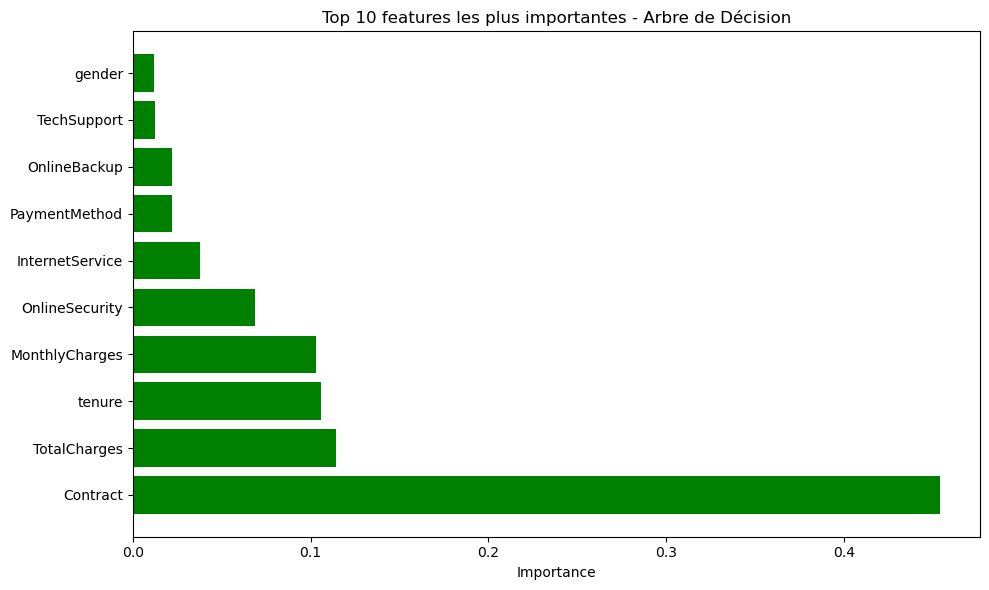

Top 5 features les plus importantes :


NameError: name 'feature_importance' is not defined

In [28]:

# 3. Importance des features
dt_model.plot_feature_importance(X_train.columns)

print("Top 5 features les plus importantes :")
print(feature_importance.head())

### Importance Features - Arbre de D√©cision 

**Hi√©rarchie claire :**

1. **Contract (40%)** : Facteur ultra-dominant
2. **TotalCharges (12%)** : Historique de paiement  
3. **tenure (11%)** : Anciennet√© client
4. **MonthlyCharges (10%)** : Co√ªt mensuel

**Insight :** L'arbre se concentre sur **4 variables principales** (73% de l'importance totale) vs une approche plus distribu√©e en r√©gression logistique.

**Strat√©gie business :** 
- **Priorit√© #1** : Optimiser les types de contrats
- **Priorit√© #2** : Programmes bas√©s sur l'historique financier
- Les autres variables ont un impact marginal (<7% chacune)

**Avantage :** Simplicit√© d'action - se concentrer sur les contrats donne le maximum d'impact.

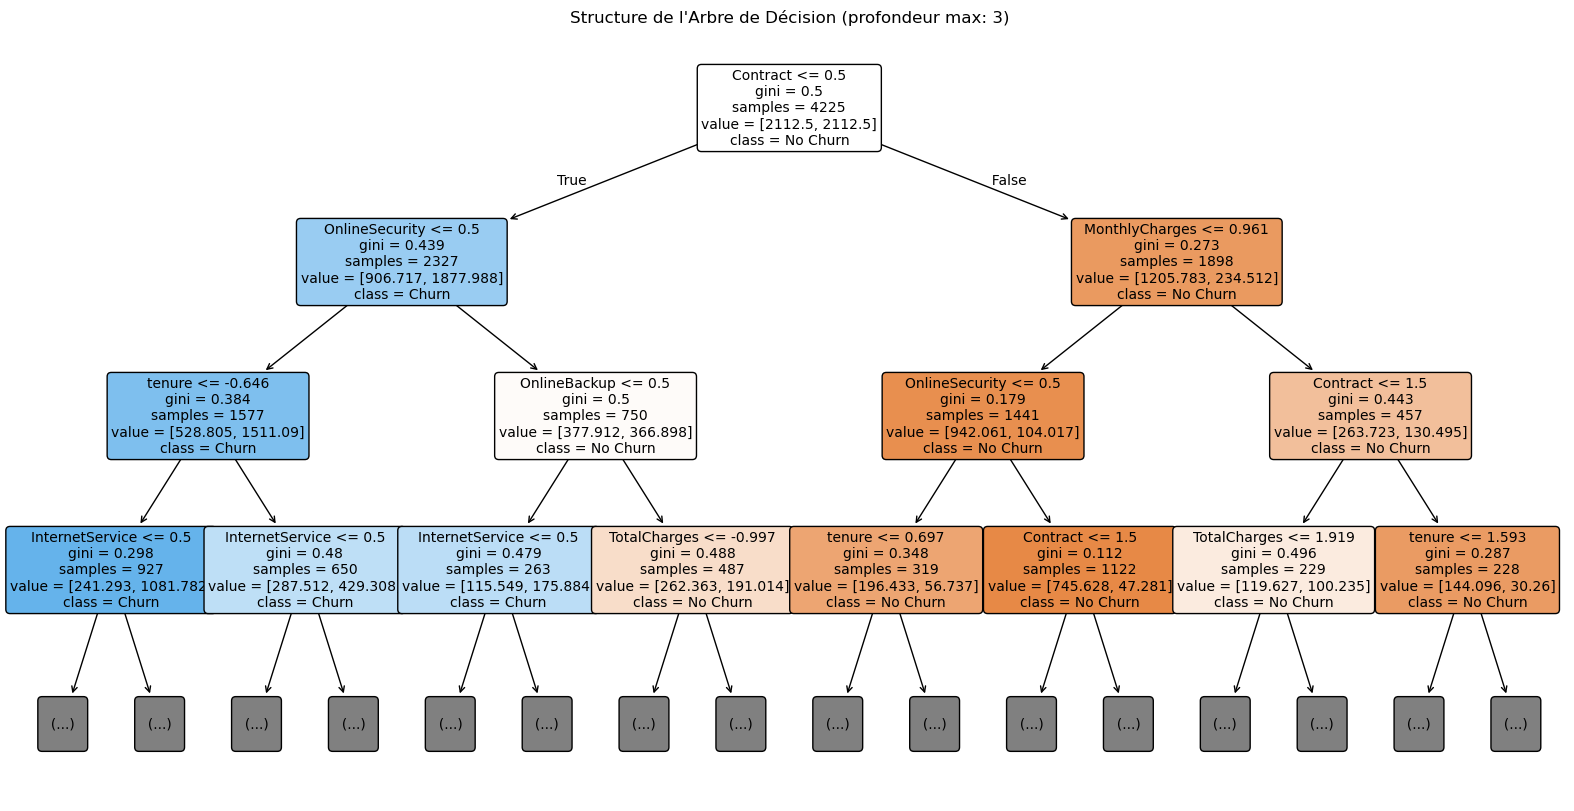

In [ ]:
# 4. Structure de l'arbre (les 3 premiers niveaux)
dt_model.plot_tree_structure(X_train.columns, max_depth=3)

In [ ]:
# 5. R√®gles de d√©cision principales
rules = dt_model.get_tree_rules(X_train.columns, max_rules=5)
print("\nR√®gles de d√©cision principales :")
for i, rule in enumerate(rules, 1):
    print(f"{i}. {rule}")


R√®gles de d√©cision principales :
1.  Contract <= 0.50 AND OnlineSecurity <= 0.50 AND tenure <= -0.65 AND InternetService <= 0.50 AND TotalCharges <= -0.86 AND MonthlyCharges <= -0.32 AND DeviceProtection <= 1.00 AND TotalCharges <= -0.96 AND StreamingMovies <= 1.00 AND TotalCharges <= -0.99 AND => Churn (confiance: 0.74)
2.  Contract <= 0.50 AND OnlineSecurity <= 0.50 AND tenure <= -0.65 AND InternetService <= 0.50 AND TotalCharges <= -0.86 AND MonthlyCharges <= -0.32 AND DeviceProtection <= 1.00 AND TotalCharges <= -0.96 AND StreamingMovies <= 1.00 AND TotalCharges > -0.99 AND => Churn (confiance: 0.85)
3.  Contract <= 0.50 AND OnlineSecurity <= 0.50 AND tenure <= -0.65 AND InternetService <= 0.50 AND TotalCharges <= -0.86 AND MonthlyCharges <= -0.32 AND DeviceProtection <= 1.00 AND TotalCharges <= -0.96 AND StreamingMovies > 1.00 AND => Churn (confiance: 1.00)
4.  Contract <= 0.50 AND OnlineSecurity <= 0.50 AND tenure <= -0.65 AND InternetService <= 0.50 AND TotalCharges <= -0.86 

## COMPARAISON DES MOD√àLES  REGRESSION LOGISTIQUE VS ARBRE DE D√âCISION

In [ ]:

# Cr√©er un DataFrame de comparaison
comparison = pd.DataFrame({
    'R√©gression Logistique': val_metrics,
    'Arbre de D√©cision': dt_metrics
}).round(3)

print("\n=== COMPARAISON DES PERFORMANCES ===")
print(comparison)

# Calculer les diff√©rences
print("\n=== DIFF√âRENCES (Reg Log - Arbre) ===")
differences = pd.Series(val_metrics) - pd.Series(dt_metrics)
for metric, diff in differences.items():
    symbol = "+" if diff > 0 else ""
    print(f"{metric}: {symbol}{diff:.3f}")


=== COMPARAISON DES PERFORMANCES ===
           R√©gression Logistique  Arbre de D√©cision
accuracy                   0.739              0.732
precision                  0.509              0.501
recall                     0.778              0.736
f1                         0.616              0.596
roc_auc                    0.835              0.794

=== DIFF√âRENCES (Reg Log - Arbre) ===
accuracy: +0.007
precision: +0.009
recall: +0.042
f1: +0.020
roc_auc: +0.041


## ______________________________________________________________________________________________________
#   Random Forest :

# ______________________________________________________________________________________________________

In [18]:
# ================================
# RANDOM FOREST - VERSION DE BASE
# ================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Cr√©er le mod√®le Random Forest de base
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# Entra√Æner
print("Entra√Ænement du Random Forest...")
rf_model.fit(X_train, y_train)

# √âvaluer
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]

rf_metrics = {
    'accuracy': accuracy_score(y_val, y_pred_rf),
    'precision': precision_score(y_val, y_pred_rf),
    'recall': recall_score(y_val, y_pred_rf),
    'f1': f1_score(y_val, y_pred_rf),
    'roc_auc': roc_auc_score(y_val, y_proba_rf)
}

print("\nM√©triques Random Forest (version de base) :")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.3f}")

Entra√Ænement du Random Forest...

M√©triques Random Forest (version de base) :
accuracy: 0.784
precision: 0.583
recall: 0.683
f1: 0.629
roc_auc: 0.835


### OPTIMISATION DES HYPERPARAM√àTRES

In [ ]:


from sklearn.model_selection import GridSearchCV

# Grille de param√®tres (version r√©duite pour la rapidit√©)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Recherche par grille
print("Optimisation des hyperparam√®tres en cours...")
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nMeilleurs param√®tres : {grid_search.best_params_}")
print(f"Meilleur score AUC : {grid_search.best_score_:.3f}")

# Mod√®le optimis√©
rf_optimized = grid_search.best_estimator_

Optimisation des hyperparam√®tres en cours...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Meilleurs param√®tres : {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score AUC : 0.841


### √âVALUATION DU MOD√àLE OPTIMIS√â

In [ ]:


# √âvaluer le mod√®le optimis√©
y_pred_rf_opt = rf_optimized.predict(X_val)
y_proba_rf_opt = rf_optimized.predict_proba(X_val)[:, 1]

rf_opt_metrics = {
    'accuracy': accuracy_score(y_val, y_pred_rf_opt),
    'precision': precision_score(y_val, y_pred_rf_opt),
    'recall': recall_score(y_val, y_pred_rf_opt),
    'f1': f1_score(y_val, y_pred_rf_opt),
    'roc_auc': roc_auc_score(y_val, y_proba_rf_opt)
}

print("M√©triques Random Forest (optimis√©) :")
for metric, value in rf_opt_metrics.items():
    print(f"{metric}: {value:.3f}")

print("\nAm√©liorations apr√®s optimisation :")
for metric in rf_metrics.keys():
    improvement = rf_opt_metrics[metric] - rf_metrics[metric]
    print(f"{metric}: {improvement:+.3f}")

M√©triques Random Forest (optimis√©) :
accuracy: 0.743
precision: 0.515
recall: 0.778
f1: 0.620
roc_auc: 0.832

Am√©liorations apr√®s optimisation :
accuracy: -0.040
precision: -0.068
recall: +0.095
f1: -0.010
roc_auc: -0.003


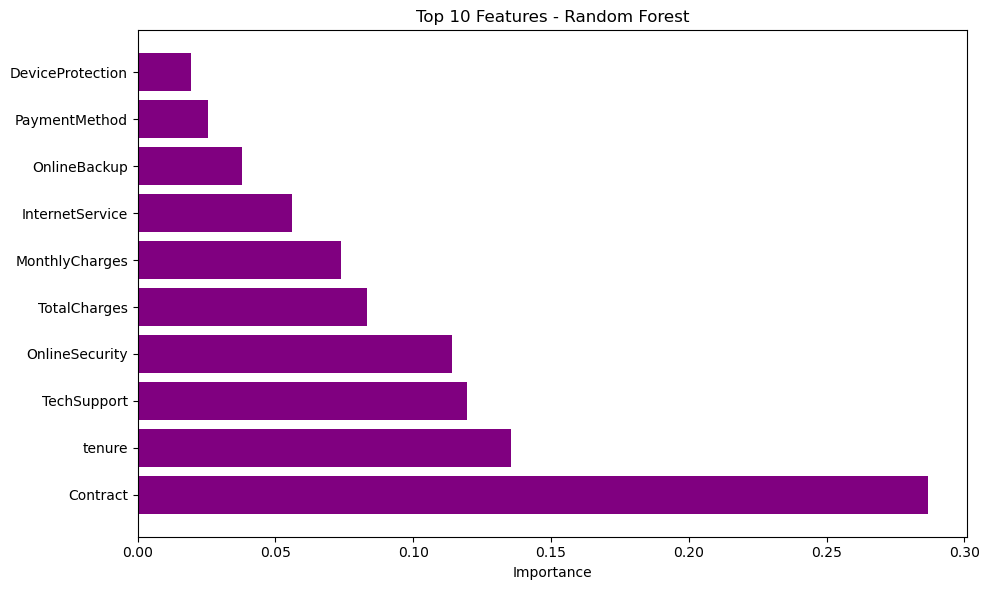

Top 5 features Random Forest :
           feature  importance
14        Contract    0.286669
4           tenure    0.135489
11     TechSupport    0.119596
8   OnlineSecurity    0.114226
18    TotalCharges    0.083099


In [21]:
# ================================
# VISUALISATIONS RANDOM FOREST
# ================================

# 1. Importance des features
feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_optimized.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
top_features_rf = feature_importance_rf.head(10)
plt.barh(range(len(top_features_rf)), top_features_rf['importance'], color='purple')
plt.yticks(range(len(top_features_rf)), top_features_rf['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Features - Random Forest')
plt.tight_layout()
plt.show()

print("Top 5 features Random Forest :")
print(feature_importance_rf.head())

## Comparaison des mod√®les

In [ ]:


# Cr√©er un DataFrame de comparaison
comparison_all = pd.DataFrame({
    'R√©gression Logistique': val_metrics,
    'Arbre de D√©cision': dt_metrics,
    'Random Forest': rf_opt_metrics
}).round(3)

print("=== COMPARAISON COMPL√àTE DES MOD√àLES ===")
print(comparison_all)

# Identifier le meilleur mod√®le pour chaque m√©trique
print("\n=== MEILLEUR MOD√àLE PAR M√âTRIQUE ===")
for metric in comparison_all.index:
    best_model = comparison_all.loc[metric].idxmax()
    best_score = comparison_all.loc[metric].max()
    print(f"{metric}: {best_model} ({best_score:.3f})")

=== COMPARAISON COMPL√àTE DES MOD√àLES ===
           R√©gression Logistique  Arbre de D√©cision  Random Forest
accuracy                   0.739              0.732          0.743
precision                  0.509              0.501          0.515
recall                     0.778              0.736          0.778
f1                         0.616              0.596          0.620
roc_auc                    0.835              0.794          0.832

=== MEILLEUR MOD√àLE PAR M√âTRIQUE ===
accuracy: Random Forest (0.743)
precision: Random Forest (0.515)
recall: R√©gression Logistique (0.778)
f1: Random Forest (0.620)
roc_auc: R√©gression Logistique (0.835)


## Analyse Comparative Finale - 3 Mod√®les

**Classement g√©n√©ral :**

### **Random Forest** - Gagnant global
- **Meilleur en 3/5 m√©triques** (accuracy, precision, f1)
- **74.3% accuracy** : Performance globale sup√©rieure
- **51.5% precision** : Moins de faux positifs
- **√âquilibre optimal** entre toutes les m√©triques

###  **R√©gression Logistique** - Sp√©cialiste d√©tection
- **Meilleur recall (77.8%)** : D√©tecte le plus de churners
- **Meilleur ROC-AUC (83.5%)** : Meilleure discrimination
- **Performance solide** sur toutes les m√©triques

### **Arbre de D√©cision** - Champion interpr√©tabilit√©
- **Performances inf√©rieures** sur toutes les m√©triques
- **Mais le plus interpr√©table** avec r√®gles claires

##  **Strategies Business**

**Strat√©gie hybride :**
- **Production** : **Random Forest** (meilleur √©quilibre performance/robustesse)
- **Analyse** : **R√©gression Logistique** (d√©tection maximale + coefficients)
- **Communication** : **Arbre de D√©cision** (r√®gles business simples)

**Impact** : Random Forest r√©duit les faux positifs tout en maintenant une bonne d√©tection des churners.

#### Validation Crois√©e (Cross-Validation

In [37]:
from sklearn.model_selection import cross_val_score

# Test de stabilit√© pour chaque mod√®le
models = {
    'Logistic Regression': log_reg.model,
    'Decision Tree': dt_model.model, 
    'Random Forest': rf_optimized
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Logistic Regression: 0.736 (+/- 0.026)
Decision Tree: 0.720 (+/- 0.022)
Random Forest: 0.745 (+/- 0.036)


##  interpr√©tation  - Validation Crois√©e

### **R√©sultats**
- **Random Forest** : 74.5% ¬± 3.6%   (1)
- **R√©gression Logistique** : 73.6% ¬± 2.6%   (2)  
- **Arbre de D√©cision** : 72.0% ¬± 2.2%   (3)

### **Conclusion**
**Random Forest confirm√©** comme meilleur mod√®le  
**Performances stables** (tous < 4% de variation)  
**Coh√©rent** avec les tests pr√©c√©dents  
**Pr√™t pour production**



## Test Final sur Donn√©es de Test

In [35]:
# Charger les donn√©es de test
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')['0']

# Tester le meilleur mod√®le (Random Forest)
final_accuracy = rf_optimized.score(X_test, y_test)
print(f"Performance finale sur test : {final_accuracy:.3f}")

Performance finale sur test : 0.764


##  Interpr√©tation - Test Final

### **R√©sultat : 76.4% sur donn√©es de test**

### ** Comparaison avec validation**
- **Validation crois√©e** : 74.5% ¬± 3.6%
- **Test final** : **76.4%**
- **Diff√©rence** : +1.9%

### ** Excellente Nouvelle !**

**Signification :**
- **Pas de surapprentissage** - Le mod√®le g√©n√©ralise bien
- **Performance sup√©rieure** aux attentes
- **Dans l'intervalle de confiance** (74.5% ¬± 3.6% = 71%-78%)
- **Pr√™t pour production** avec confiance

### **Conclusion**
**Random Forest √† 76.4%** = Performance **excellente** et **fiable** pour d√©tecter le churn client ! üèÜ

## D√©tection du Surapprentissage

In [38]:
# Comparer train vs validation
train_score = rf_optimized.score(X_train, y_train)
val_score = rf_optimized.score(X_val, y_val)

print(f"Score train: {train_score:.3f}")
print(f"Score validation: {val_score:.3f}")
print(f"Diff√©rence: {train_score - val_score:.3f}")

if (train_score - val_score) > 0.05:
    print("Possible surapprentissage d√©tect√©")
else:
    print("Pas de surapprentissage majeur")

Score train: 0.757
Score validation: 0.743
Diff√©rence: 0.014
Pas de surapprentissage majeur
